# Red Neuronal Profunda (DNN) para clasificación MNIST

Aplicaremos todos nuestros conocimientos para crear una DNN, frecuentemente llamada también una Artificial Neural Network (ANN).  El problema que vamos a trabajar se conoce como el "Hola Mundo" del aprendizaje profundo porque para la mayoría de estudiantes este es el primer algoritmo de aprendizaje profundo que ven. 

El conjunto de datos se llama MNIST y se refiere al reconocimiento de dígitos escritos a mano.  Pueden encontrar más información en el sitio web de Yann LeCun (Director of AI Research, Facebook).  El es uno de los pioneros de todo este tema, así como de otras metodologías más complejas como las Redes Neurales Convolucionales (CNN) que se utilizan hoy día.

El conjunto de datos tiene 70,000 imágenes (28x28 pixels) de dígitos escritos a mano (1 dígito por imagen).

La meta es escribir un algoritmo que detecta qué dígito ha sido escrito.  Como solo hay 10 dígitos (0 al 9), este es un problema de clasificación con 10 clases.

Nuestra meta será construir una RN con 2 capas escondidas.

## Plan de Acción para preparar el modelo

1.  Preparar los datos y preprocesarlos.  Crear los conjuntos de datos para entrenar, validar y probar
2.  Crear un esboso del modelo y seleccionar las funciones de activación
3.  Fijar los optimizadores avanzados y la función de pérdida
4.  Hacer que el modelo aprenda
5.  Probar la exactitud ("accuracy") del modelo

## Importar los paquetes relevantes

TensorFlow incluye un proveedor de los datos de MNIST que utilizaremos acá.  Viene con el módulo **"tensorflow.keras.datasets"**. 

In [1]:
import numpy as np
import tensorflow as tf

La siguiente instrucción, cuando se corre por primera vez, descarga el conjunto de datos en lo indicado por el parámetro path, relativo a  ~/.keras/datasets).  Como si se hubiera ejecutado Lo siguiente:

tf.keras.datasets.mnist.load_data(
    path = 'mnist.npz'
)

luego separa los datos en un conjunto para entrenamiento y otro para pruebas.

Si se ejecuta más de una vez, ya no descarga el archivo.

In [2]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()


In [3]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Como no podemos ver la forma de los conjuntos...les queda de tarea averiguar por qué no...podemos utilizar la instrucción **assert**

In [4]:
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

## Datos

Esta sección es donde pre-procesaremos nuestros datos.

Por default, TF2 tiene conjuntos de datos de entrenamiento y de prueba, pero no tiene un conjunto de validación, por lo que debemos dividirlo por nuestra cuenta

Lo haremos del mismo tamaño que el conjunto de prueba

In [5]:
num_obs_validacion = y_prueba.shape[0]

Usaremos una variable dedicada para el número de observaciones de prueba

In [6]:
num_obs_prueba = y_prueba.shape[0]

Generalmente preferimos "normalizar" nuestros datos en alguna forma para que el resultado sea numéricamente más estable.  En este caso simplemente preferimos tener entradas entre 0 y 1, por lo que definimos una función, que reciba la imagen MNIST.

Como los posibles valores de las entradas son entre 0 y 255 (256 posibles tonos de gris), al dividirlos por 255 obtenemos el resultado deseado.

In [7]:
X_entreno_normalizado = X_entreno / 255

Finalmente, normalizaremos y convertiremos los datos de pruebas en tandas.  Los normalizamos para que tengan la misma magnitud que los datos de entrenamiento y validación.

No hay necesidad de "barajearlo" ya que no estaremos entrenando con los datos de prueba.  Habra una sola tanda, igual al tamaño de los datos de prueba.

In [8]:
X_prueba_normalizado = X_prueba / 255

Una vez se han "normalizado" los datos, podemos proceder a extraer los datos de entrenamiento y de validación.

Nuestros datos de validación serán 10000 para ser igual al conjunto de prueba.

Finalmente, creamos una tanda con un tamaño de tanda igual al total de muestras de validación.

In [9]:
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]

Similarmente, los datos de entrenamiento son todos los demás por lo que nos salteamos tantas observaciones como las hay en el conjunto de validación.

In [10]:
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

Convertir de Arreglos Numpy a Tensores

In [11]:
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

Barajear y hacer tandas con el conjunto de datos de entrenamiento

In [12]:
TAMANIO_TANDA = 100
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

Hacer tandas con los conjuntos de validación y prueba, no se necesita barajearlos

In [13]:
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

## Modelo

### Delineamos el modelo

Cuando pensamos sobre un algoritmo de aprendizaje profundo, casi siempre imaginamos la realización del mismo.  Asi que esta vez, hagámoslo.  :)

In [14]:
tamanio_entrada = 784
tamanio_salida = 10

Usaremos el mismo ancho para ambas capas escondidas.  (No es una necesidad!)

In [15]:
tamanio_capa_escondida = 50

# Modelo original

La primera capa (la de entrada):  cada observación es de 28x28 píxeles, por lo tanto es un tensor de rango 2.

Como aún no hemos aprendido sobre CNNs, no sabemos como alimentar este tipo de entrada a nuestra red, por lo tanto hay que "aplanar" las imágenes.  Hay un método conveniente **Flatten** que toma nuestro tensor de 28x28 y lo convierte en  un vector (None,) o (784,)...porque 28x28 = 784.  Esto nos permite crear una red de alimentación hacia adelante.

    
**tf.keras.layers.Dense** básicamente implementa:  *salida = activation(dot(entrada, peso) + sesgo)*.  Requiere varios argumentos, pero los más importantes para nosotros son el ancho de la capa escondida y la función de activación.

La capa final no es diferente, solo nos aseguramos de activarla con **softmax**


In [16]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 2nda capa escondida

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

c:\Users\Fabi\Documents\U\python_env\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Seleccionar el optimizador y la función de pérdida

Definimos el optimizador que nos gustaría utilizar, la función de pérdida, y las métricas que nos interesa obtener en cada interacción

In [17]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Acá es donde entrenamos el modelo que hemos construído

Determinamos el número máximo de épocas.

Ajustamos el modelo , especificando:

* los datos de entrenamiento
* el número total de épocas
* y los datos de validación que creamos en el formato (entradas, metas)

In [18]:
NUMERO_EPOCAS = 5

modelo.fit(datos_entreno,
          epochs = NUMERO_EPOCAS, 
          validation_data = datos_validacion,
          verbose = 2)

Epoch 1/5
500/500 - 3s - 6ms/step - accuracy: 0.8669 - loss: 0.4536 - val_accuracy: 0.9385 - val_loss: 0.2160
Epoch 2/5
500/500 - 2s - 3ms/step - accuracy: 0.9393 - loss: 0.2084 - val_accuracy: 0.9528 - val_loss: 0.1625
Epoch 3/5
500/500 - 2s - 3ms/step - accuracy: 0.9541 - loss: 0.1569 - val_accuracy: 0.9546 - val_loss: 0.1577
Epoch 4/5
500/500 - 2s - 3ms/step - accuracy: 0.9631 - loss: 0.1275 - val_accuracy: 0.9635 - val_loss: 0.1231
Epoch 5/5
500/500 - 2s - 3ms/step - accuracy: 0.9686 - loss: 0.1064 - val_accuracy: 0.9628 - val_loss: 0.1230


## Probar el modelo

Como se discutió en clase, luego del entrenamiento (con los datos de entrenamiento), y la validación (con los datos de validación), probamos el potencial de predicción final de nuestro modelo con el conjunto de datos de prueba que el algoritmo NUNCA ha visto antes.

Es muy importante reconocer que estar "jugando" con los hiperparámetros sobre-ajusta el conjunto de datos de validación.

La prueba es la instancia absolutamente final. **NUNCA** debe probarse el modelo antes de haber completamente ajustado el mismo.

Si se ajusta el modelo después de hacer la prueba, se empezará a sobre-ajustar el conjunto de datos de prueba, que echaría "por los suelos" el propósito original del mismo.

In [19]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9557 - loss: 22.8230


In [20]:
# Si se desea, se puede aplicar un formateo "bonito"
print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))

Pérdida de prueba: 20.18. Precisión de prueba: 96.05%


Utilizando el modelo inicial y los hiperparámetros dados en este notebook, la precisión de prueba final debe ser aproximadamente 97%.

Cada vez que se ejecuta el código, se obtiene una precisión diferente debido a la "barajeada" de las tandas, los pesos se inicializan en forma diferente, etc.

Finalmente, intencionalmente se ha llegado a una solución subóptima, para que puedan tener la oportunidad de mejorarla como ejercicio de laboratorio.

# Experimentación
## Paso a paso para mejorar el modelo 

## Modificación del Ancho de la Red

In [29]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def build_and_train_model(hidden_units):
    model = tf.keras.Sequential([

        tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
        
        tf.keras.layers.Dense(hidden_units, activation='relu'), # 1era capa escondida
        tf.keras.layers.Dense(hidden_units, activation='relu'), # 2nda capa escondida

        tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(datos_entreno, validation_data = datos_validacion, epochs=5, verbose=0)
    duration = time.time() - start_time

    val_accuracy = history.history['val_accuracy'][-1]
    test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)
    return hidden_units, val_accuracy, test_accuracy, duration

# Resultados del experimento de ancho
results_width = []

# Tamaños de capa escondida
sizes = [50, 100, 200, 300, 500]

# Obtención de resultados
best_result_ms = None
best_val_acc = -1
for size in sizes:
    result = build_and_train_model(size)
    results_width.append(result)
    if result[1] > best_val_acc:
        best_val_acc = result[1]
        best_result_ms = result

print(f"\n✅ Mejor configuración: {best_result_ms[0]} neuronas - Accuracy validación: {best_result_ms[1]:.4f} - Accuracy test: {best_result_ms[2]:.4f} - Tiempo: {best_result_ms[3]:.2f}s")

c:\Users\Fabi\Documents\U\python_env\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



✅ Mejor configuración: 300 neuronas - Accuracy validación: 0.9798 - Accuracy test: 0.9799 - Tiempo: 15.40s


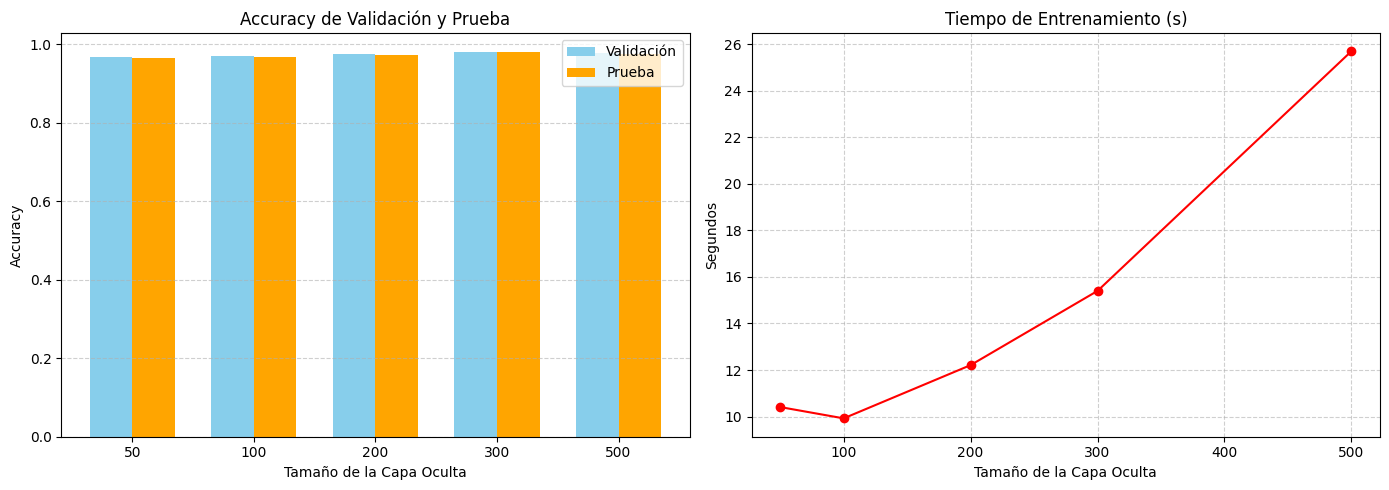

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Separar resultados
sizes, val_accuracies, test_accuracies, times = zip(*results_width)

# Posiciones para las barras
x = np.arange(len(sizes))
width = 0.35  # ancho de cada barra

# Crear figura con 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Subplot 1: Accuracy de Validación y Prueba ---
axs[0].bar(x - width/2, val_accuracies, width, label='Validación', color='skyblue')
axs[0].bar(x + width/2, test_accuracies, width, label='Prueba', color='orange')

axs[0].set_xlabel("Tamaño de la Capa Oculta")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Accuracy de Validación y Prueba")
axs[0].set_xticks(x)
axs[0].set_xticklabels(sizes)
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# --- Subplot 2: Tiempo de Entrenamiento ---
axs[1].plot(sizes, times, marker='o', color='red')
axs[1].set_title("Tiempo de Entrenamiento (s)")
axs[1].set_xlabel("Tamaño de la Capa Oculta")
axs[1].set_ylabel("Segundos")
axs[1].grid(True, linestyle='--', alpha=0.6)

# Ajustar diseño
plt.tight_layout()
plt.show()


Para capa de 200 neuronas:
* ¿Cómo cambia la precisión de validación del modelo?

* ¿Cuánto tiempo tarda el algoritmo en entrenar?

Comparación de tamaños:

## Modificación de la Profundidad de la Red

In [31]:
hidden_size = best_result_ms[0]
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(hidden_size, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(hidden_size, activation='relu'), # 2nda capa escondida
    tf.keras.layers.Dense(hidden_size, activation='relu'), # capa escondida adicional

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(datos_entreno, validation_data = datos_validacion, epochs=5, verbose=0)
duration = time.time() - start_time

val_accuracy = history.history['val_accuracy'][-1]
test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)

for layer in model.layers:
    if hasattr(layer, 'weights'):
        print(f"Dimensión pesos: {layer}")

result_three = [val_accuracy, test_accuracy, duration]
print(f"Modelo con 3 capas escondidas - Accuracy validación: {val_accuracy:.4f} - Accuracy prueba: {test_accuracy:.4f} - Tiempo: {duration:.2f}s")

c:\Users\Fabi\Documents\U\python_env\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Dimensión pesos: <Flatten name=flatten_25, built=True>
Dimensión pesos: <Dense name=dense_88, built=True>
Dimensión pesos: <Dense name=dense_89, built=True>
Dimensión pesos: <Dense name=dense_90, built=True>
Dimensión pesos: <Dense name=dense_91, built=True>
Modelo con 3 capas escondidas - Accuracy validación: 0.9728 - Accuracy prueba: 0.9727 - Tiempo: 17.27s


## Redes Profundas

In [32]:
def build_very_deep_model(units_per_layer):
    model = Sequential([Flatten(input_shape=(28, 28))])
    for units in units_per_layer:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time()
    history = model.fit(datos_entreno, validation_data=datos_validacion, epochs=5, verbose=0)
    duration = time.time() - start_time
    val_accuracy = history.history['val_accuracy'][-1]

    test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)

    print(f"Capas: {len(units_per_layer)} - Arquitectura: {units_per_layer} - Accuracy validación: {val_accuracy:.4f} - Tiempo: {duration:.2f}s")
    return len(units_per_layer), val_accuracy, test_accuracy, duration

architectures = [
    [hidden_size],
    [200, 100],
    [300, 200, 100],
    [500, 250, 100, 50],
    [500, 350, 250, 100, 50]
]

# Obtención de resultados
best_result_deep = None
best_val_acc = -1
for arch in architectures:
    result = build_very_deep_model(arch)
    results_width.append(result)
    if result[1] > best_val_acc:
        best_val_acc = result[1]
        best_result_deep = result
print(f"\n✅ Mejor configuración: {best_result_deep[0]} neuronas - Accuracy validación: {best_result_deep[1]:.4f} - Accuracy test: {best_result_deep[2]:.4f} - Tiempo: {best_result_deep[3]:.2f}s")

Capas: 1 - Arquitectura: [300] - Accuracy validación: 0.9752 - Tiempo: 12.88s
Capas: 2 - Arquitectura: [200, 100] - Accuracy validación: 0.9763 - Tiempo: 13.15s
Capas: 3 - Arquitectura: [300, 200, 100] - Accuracy validación: 0.9757 - Tiempo: 17.01s
Capas: 4 - Arquitectura: [500, 250, 100, 50] - Accuracy validación: 0.9759 - Tiempo: 22.73s
Capas: 5 - Arquitectura: [500, 350, 250, 100, 50] - Accuracy validación: 0.9761 - Tiempo: 27.09s

✅ Mejor configuración: 2 neuronas - Accuracy validación: 0.9763 - Accuracy test: 0.9749 - Tiempo: 13.15s


## Funciones de Activación I

In [33]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation='sigmoid'),
    Dense(50, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(datos_entreno, validation_data=datos_validacion, epochs=5, verbose=0)
duration = time.time() - start_time

test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)
val_accuracy = history.history['val_accuracy'][-1]

result_sigmoid = [val_accuracy, test_accuracy, duration]
print(f"Activaciones sigmoid - Accuracy validación: {val_accuracy:.4f} - Accuracy test: {test_accuracy:.4f} - Tiempo: {duration:.2f}s")

Activaciones sigmoid - Accuracy validación: 0.9591 - Accuracy test: 0.9520 - Tiempo: 10.75s


In [34]:
arqui = architectures[best_result_deep[0] - 1]
model = Sequential([Flatten(input_shape=(28, 28))])
for units in arqui:
    model.add(Dense(units, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(datos_entreno, validation_data=datos_validacion, epochs=5, verbose=0)
duration = time.time() - start_time

test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)
val_accuracy = history.history['val_accuracy'][-1]

if val_accuracy > result_sigmoid[0]:
    result_sigmoid = [val_accuracy, test_accuracy, duration]
print(f"Activaciones sigmoid + capas anteriores - Accuracy validación: {val_accuracy:.4f} - Accuracy test: {test_accuracy:.4f} - Tiempo: {duration:.2f}s")

Activaciones sigmoid + capas anteriores - Accuracy validación: 0.9750 - Accuracy test: 0.9768 - Tiempo: 13.32s


## Funciones de Activación II

In [35]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation='relu'),
    Dense(50, activation='tanh'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(datos_entreno, validation_data=datos_validacion, epochs=5, verbose=0)
duration = time.time() - start_time

test_loss, test_accuracy = model.evaluate(datos_prueba, verbose=0)
val_accuracy = history.history['val_accuracy'][-1]

result_relu_tanh = [val_accuracy, test_accuracy, duration]
print(f"Activación ReLU + tanh - Accuracy validación: {val_accuracy:.4f} - Accuracy test: {test_accuracy:.4f} - Tiempo: {duration:.2f}s")

Activación ReLU + tanh - Accuracy validación: 0.9728 - Accuracy test: 0.9704 - Tiempo: 9.67s


## Comparación de modelos

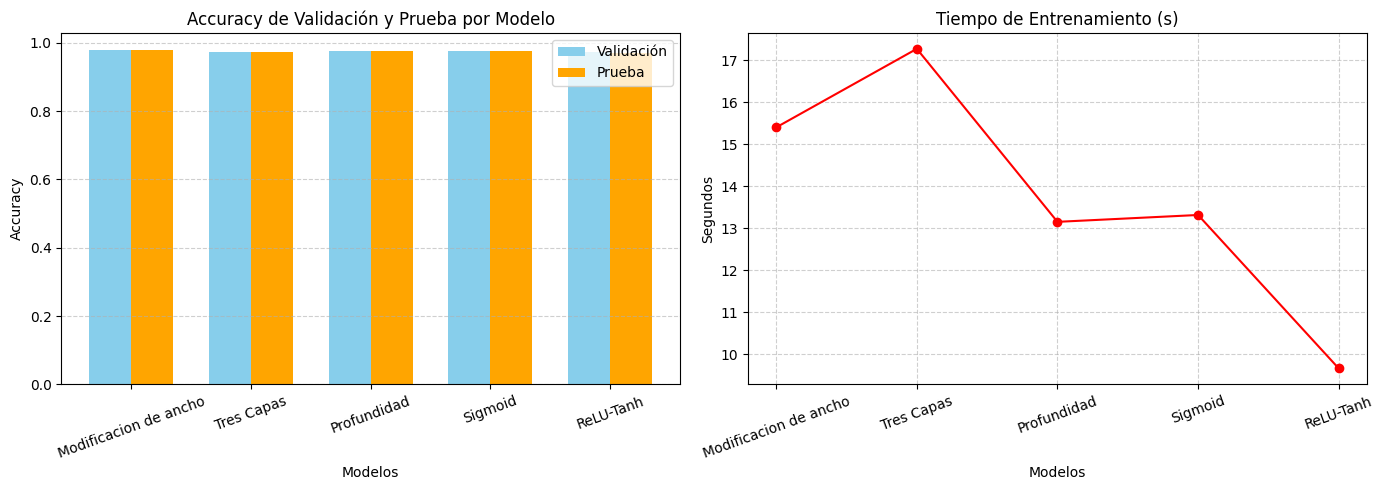

In [36]:

# Lista de resultados de modelos en forma [val_acc, test_acc, tiempo]
result_sets = [best_result_ms[1:], result_three, best_result_deep[1:], result_sigmoid, result_relu_tanh]

# Nombres para los modelos (puedes personalizarlos)
model_names = ['Modificacion de ancho', 'Tres Capas', 'Profundidad', 'Sigmoid', 'ReLU-Tanh']

# Separar métricas
val_accuracies = [res[0] for res in result_sets]
test_accuracies = [res[1] for res in result_sets]
times = [res[2] for res in result_sets]

# Posiciones para las barras
x = np.arange(len(model_names))
width = 0.35

# Crear figura con 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Subplot 1: Accuracy de Validación y Prueba ---
axs[0].bar(x - width/2, val_accuracies, width, label='Validación', color='skyblue')
axs[0].bar(x + width/2, test_accuracies, width, label='Prueba', color='orange')

axs[0].set_xlabel("Modelos")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Accuracy de Validación y Prueba por Modelo")
axs[0].set_xticks(x)
axs[0].set_xticklabels(model_names, rotation=20)
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.6)

# --- Subplot 2: Tiempo de Entrenamiento ---
axs[1].plot(x, times, marker='o', color='red')
axs[1].set_title("Tiempo de Entrenamiento (s)")
axs[1].set_xlabel("Modelos")
axs[1].set_ylabel("Segundos")
axs[1].set_xticks(x)
axs[1].set_xticklabels(model_names, rotation=20)
axs[1].grid(True, linestyle='--', alpha=0.6)

# Ajustar diseño
plt.tight_layout()
plt.show()